In [244]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams as rcP
%matplotlib inline

In [245]:
# Loading the dataset
df = pd.read_csv('pune_House_Data.csv')
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [246]:
# Exploring the dataset
df.shape

(13320, 9)

In [247]:
# Exploring the dataset
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [248]:
# Exploring the dataset
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [249]:
# Exploring the dataset
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [250]:
# Exploring the dataset
df.groupby('site_location')['site_location'].agg('count')

site_location
Alandi Road        139
Ambegaon Budruk    139
Anandnagar         139
Aundh              139
Aundh Road         139
                  ... 
Wakadewadi         138
Wanowrie           138
Warje              138
Yerawada           138
other                1
Name: site_location, Length: 97, dtype: int64

In [251]:
# Removing the columns of society
df = df.drop('society', axis='columns')
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


## Data Cleaning Process

In [252]:
# Data Cleaning
# Checking the null values in the dataset
df.isnull().sum()

area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [253]:
# Applying median to the balcony and bath column
from math import floor

balcony_median = float(floor(df.balcony.median()))
bath_median = float(floor(df.bath.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)

In [254]:
# Checking the null values in the dataset again
df.isnull().sum()

area_type         0
availability      0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

In [255]:
# Dropping the rows with null values because the dataset is huge as compared to null values.
df = df.dropna()
df.isnull().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [256]:
# Converting the size column to bhk
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis='columns')
df.groupby('bhk')['bhk'].agg('count')

bhk
1      656
2     5527
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [257]:
# Exploring the total_sqft column
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [258]:
# Since the total_sqft contains range values such as 1133-1384, lets filter out these values
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [259]:
# Displaying all the rows that are not integers
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
30,Super built-up Area,19-Dec,2100 - 2850,4.0,0.0,186.000,Gultekdi,4
56,Built-up Area,20-Feb,3010 - 3410,2.0,2.0,192.000,Model colony,4
81,Built-up Area,18-Oct,2957 - 3450,2.0,2.0,224.500,Shukrawar Peth,4
122,Super built-up Area,18-Mar,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,4
137,Super built-up Area,19-Mar,1042 - 1105,2.0,0.0,54.005,Khadaki,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,3
13059,Super built-up Area,Ready To Move,1200 - 1470,2.0,0.0,72.760,Anandnagar,2
13240,Super built-up Area,Ready To Move,1020 - 1130,2.0,2.0,52.570,Vadgaon Budruk,1
13265,Super built-up Area,20-Sep,1133 - 1384,2.0,0.0,59.135,Dapodi,2


In [260]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [261]:
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0


In [262]:
# Removing the rows in new_total_sqft column that hase None values
df.isna().sum()

area_type          0
availability       0
bath               0
balcony            0
price              0
site_location      0
bhk                0
new_total_sqft    46
dtype: int64

In [263]:
# Removing the rows in new_total_sqft column that hase None values
df = df.dropna()
df.isna().sum()

area_type         0
availability      0
bath              0
balcony           0
price             0
site_location     0
bhk               0
new_total_sqft    0
dtype: int64

## Feature Engineering

In [264]:
# Adding a new column of price_per_sqft
df1 = df.copy()

# In our dataset the price column is in Lakhs
df1['price_per_sqft'] = (df1['price']*100000)/df1['new_total_sqft']
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [265]:
# Checking unique values of 'location' column
locations = list(df['site_location'].unique())
print(len(locations))

97


In [266]:
# Removing the extra spaces at the end
df1.site_location = df1.site_location.apply(lambda x: x.strip())

# Calulating all the unqiue values in 'site_location' column
location_stats = df1.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Pune Railway Station    139
Paud Road               139
Ganesh Peth             139
Mangalwar peth          139
Manik Bagh              139
                       ... 
Nagar Road              136
Narayangaon             136
Fatima Nagar            136
Camp                    136
other                     1
Name: site_location, Length: 97, dtype: int64

In [267]:
# Checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df1.site_location.unique()))

1 97


In [268]:
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [269]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]

df1.site_location = df1.site_location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df1.site_location.unique())

97

In [270]:
# Checking the unique values in 'availability column'
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
15-Jun               1
15-Dec               1
15-Aug               1
14-Nov               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [271]:
# Labelling the dates into Not Ready
dates = df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

dates_not_ready = dates[dates<10000]
df1.availability = df1.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

len(df1.availability.unique())

2

In [272]:
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [273]:
# Checking the unique values in 'area_type' column
df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

# Since the column has only few unique values, we don't perform any operation

area_type
Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

## Removing Outliers

In [274]:
# Removing the rows that have 1 Room for less than 300sqft

df2 = df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2), len(df1))

12513 13257


In [275]:
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.567166
std        4160.879784
min         267.829813
25%        4211.469534
50%        5295.138889
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [276]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('site_location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

df3 = remove_pps_outliers(df2)
print(len(df2), len(df3))

12513 10937


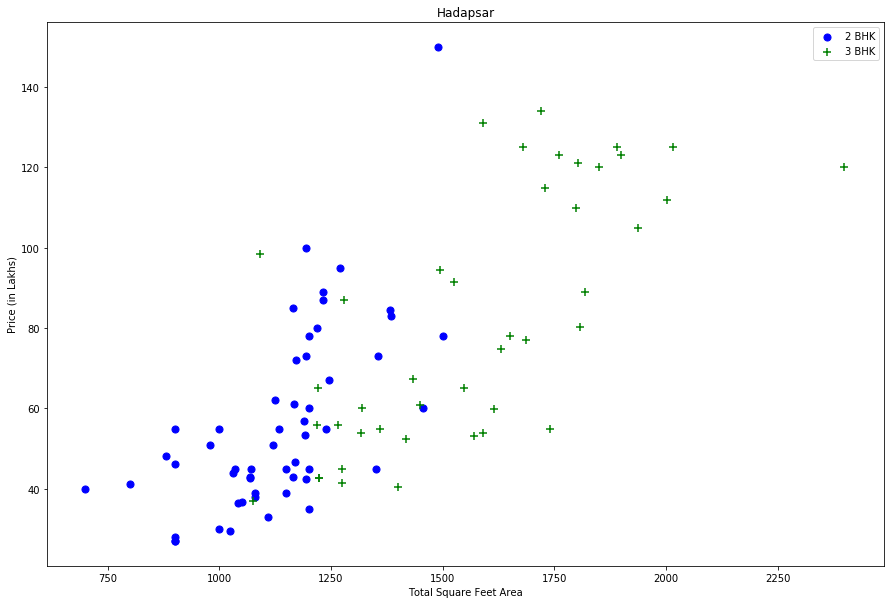

In [277]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location == site_location) & (df.bhk == 2)]
    bhk3 = df[(df.site_location == site_location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df3, 'Hadapsar')

In [278]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}
        
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

10937 7459


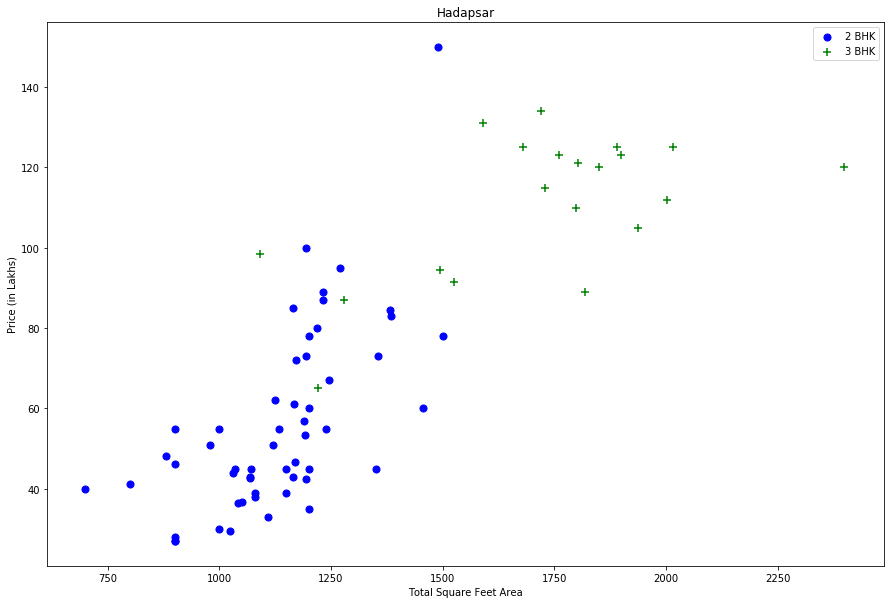

In [279]:
plot_scatter_chart(df4, 'Hadapsar')

Text(0, 0.5, 'Count')

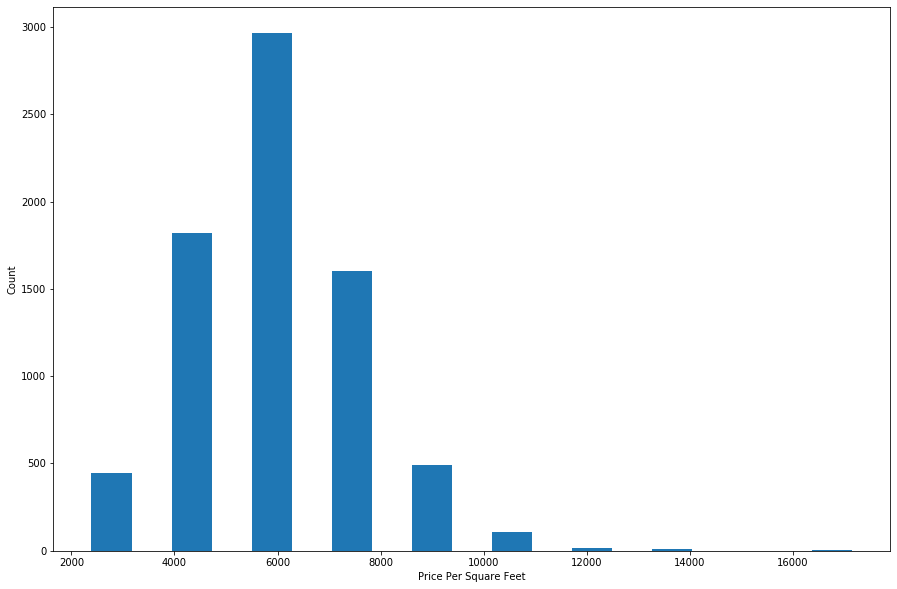

In [280]:
plt.hist(df4.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

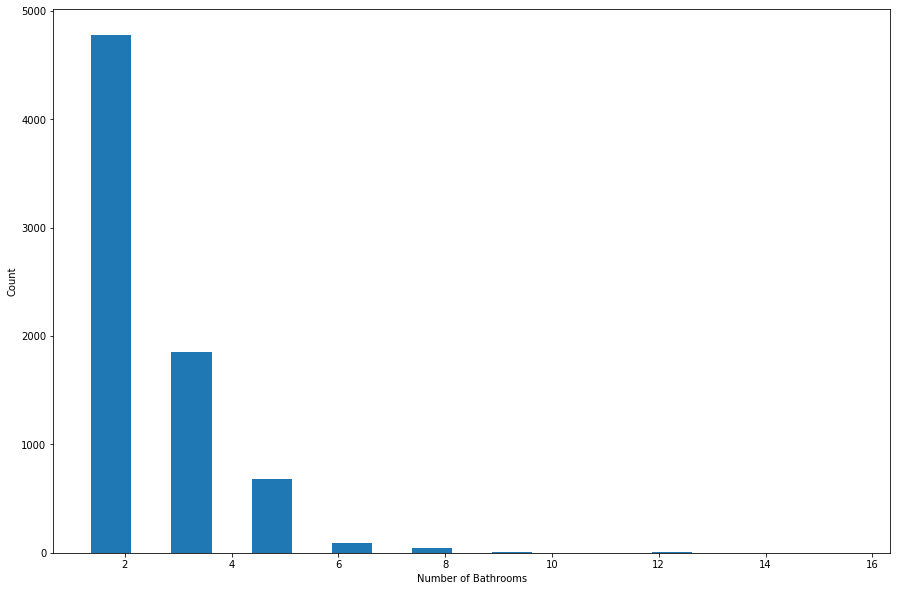

In [281]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [282]:
# Removing the rows that have 'bath' greater than 'bhk'+2
df5 = df4[df4.bath<(df4.bhk+2)]
print(len(df4), len(df5))

7459 7395


In [283]:
df5.tail()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
10923,Super built-up Area,Not Ready,2.0,1.0,67.0,Yerawada,2,1165.0,5751.072961
10928,Built-up Area,Ready To Move,6.0,2.0,115.0,Yerawada,6,3500.0,3285.714286
10931,Built-up Area,Not Ready,2.0,2.0,353.0,Yerawada,5,3210.0,10996.884735
10932,Super built-up Area,Ready To Move,2.0,2.0,54.0,Yerawada,2,1050.0,5142.857143
10936,Super built-up Area,Not Ready,2.0,1.0,70.0,Yerawada,2,1132.0,6183.745583


## Model Building

In [284]:
# Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop('price_per_sqft', axis='columns')

In [285]:
df6.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,4.0,1.0,245.00,Alandi Road,4,2894.0
2,Super built-up Area,Ready To Move,2.0,2.0,50.00,Alandi Road,2,1084.0
3,Super built-up Area,Ready To Move,2.0,2.0,80.00,Alandi Road,2,1230.0
4,Super built-up Area,Ready To Move,3.0,2.0,130.00,Alandi Road,3,1750.0


In [286]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.site_location)
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [287]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [288]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [289]:
df6.drop(['area_type','availability','site_location'], axis='columns', inplace=True)
df6.head(10)

,bath,balcony,price,bhk,new_total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,2.0,1.0,39.07,2,1056.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1.0,245.00,4,2894.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2.0,2.0,50.00,2,1084.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,2.0,80.00,2,1230.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.0,2.0,130.00,3,1750.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2.0,1.0,41.00,2,995.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8,2.0,1.0,95.00,2,1360.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,2.0,2.0,50.00,2,1040.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
10,3.0,2.0,86.06,3,1655.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,5.0,3.0,198.00,4,2790.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
# Size of the dataset
df6.shape

(7395, 105)

In [291]:
# Splitting the dataset into features and label
X = df6.drop('price', axis='columns')
y = df6['price']

In [292]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [293]:
# Creating a function for GridSearchCV

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

,model,best_parameters,accuracy
0,linear_regression,{'normalize': True},0.835475
1,lasso,"{'alpha': 2, 'selection': 'random'}",0.829241
2,decision_tree,"{'criterion': 'mse', 'splitter': 'best'}",0.781004


#### Since the Linear Regression has the highest accuracy, the model selected for this problem is Linear Regression

In [294]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [295]:
# Creating Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [296]:
model.score(X_test, y_test)

0.8180571987758956

#### Predicting the values using our trained model

In [297]:
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       ...
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada', 'Ready To Move', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area'],
      dtype='object', length=104)

In [298]:
# For finding the appropriate location
np.where(X.columns=='Balaji Nagar')[0][0]

9

In [299]:
# For finding the appropriate area_type
np.where(X.columns=='Built-up  Area')[0][0]

101

In [300]:
# For finding the appropriate availability
np.where(X.columns=='Ready To Move')[0][0]

100

In [301]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):
    
    loc_index, area_index, avail_index = -1,-1,-1
        
    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])
    
    if area_type!='Super built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]
        
    if availability!='Not Ready':        
        avail_index = np.where(X.columns==availability)[0][0]
            
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1
        
    return model.predict([x])[0]

In [302]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Balaji Nagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

52.17049124040433

In [303]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Hadapsar', 2, 2, 2, 1000, 'Super built-up  Area', 'Ready To Move')

52.09543340931981

In [304]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Camp', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

140.1821349541965

In [305]:
# Prediction 4
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Baner', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

140.2386444110721